# Analytics Analysis

In [2]:
# importing the required libraries
import os
import pandas as pd
import matplotlib.pyplot as plt

os.chdir( os.path.join("..", "..") )

from Code.src.modules.db_ops import *
from Code.src.modules.dataManager import DataManager
from Code.src.modules.eda import *

DM = DataManager()

In [3]:
# Importing the data
df_finalEnrollment = DM.get_data('EnrollmentFinalStatus', 'pkl', 'processed')
db_finalEnrollment = DM.get_data('EnrollmentFinalStatus', 'db', 'processed')

In [4]:
# Creating a new folder to store the output, if it doesn't exist
try:
    os.mkdir( os.path.join("Data", "02_processed", "BernieAnalytics") )
except:
    pass

In [5]:
df_finalEnrollment.reg_status.value_counts()

**Web Registered**                50631
Wait Listed                        4212
**Registered**                     2981
Drop-Course Cancelled               959
Drop/Delete                         485
Web Drop (Liability)                115
Web Withdrawal                       20
Registered for Audit                  2
Selective Withdrawal Exception        2
Withdrawal from Course                2
Name: reg_status, dtype: int64

# Core Course Demands in first semester

## Tables

### MS Data Analytics Engineering

First Semester Course Demand
- International Students only
- Fall Semesters only
- Data Analytics Engineering Program only
- Demand calculated as Registration Status is in ("Web Registered", "Wait Listed", "Registered")
- Core Courses only

In [6]:
query1 = db_finalEnrollment.runQuery(""" --sql
    SELECT
        stu_admit_term_desc AS Semester,
        COUNT(DISTINCT stu_id) AS 'Total International Students Admitted',
        SUM(CASE WHEN crs = 'AIT 580' THEN 1 ELSE 0 END) AS 'AIT 580',
        SUM(CASE WHEN crs = 'CS 504' THEN 1 ELSE 0 END) AS 'CS 504',
        SUM(CASE WHEN crs = 'STAT 515' THEN 1 ELSE 0 END) AS 'STAT 515',
        SUM(CASE WHEN crs = 'OR 531' THEN 1 ELSE 0 END) AS 'OR 531'
    FROM EnrollmentFinalStatus
    WHERE
                stu_visa = 'F1 Visa'
        AND     stu_prog_desc = 'MS Data Analytics Engineering'
        AND     stu_admit_term_year > 2017
        AND     reg_status IN ("**Web Registered**", "Wait Listed", "**Registered**")
        AND     reg_term_desc = stu_admit_term_desc
        AND     reg_term_name = 'Fall'
    GROUP BY
        stu_admit_term_desc
    ORDER BY
        stu_admit_term_code
""")

# query1.to_csv( os.path.join("Data", "02_processed", "BernieAnalytics") , index=False)

In [7]:
query1

,Semester,Total International Students Admitted,AIT 580,CS 504,STAT 515,OR 531
0,Fall 2018,83,63,41,58,51
1,Fall 2019,78,59,46,59,51
2,Fall 2020,53,32,34,36,27
3,Fall 2021,149,131,116,132,94
4,Fall 2022,189,183,89,186,159


In [8]:
# query1.set_index('stu_admit_term_desc').plot(
#     kind='line', figsize=(15, 8),
#     title = "Demand of core courses for Student Cohorts in their first semester (Fall only)",
#     xlabel = "Semesters (Fall only)",
#     ylabel = "Student Demand",
#     grid = True
# )

In [9]:
query2 = db_finalEnrollment.runQuery(""" --sql
    SELECT
        stu_admit_term_desc AS Semester,
        COUNT(DISTINCT stu_id) AS 'Total International Students Admitted',
        SUM(CASE WHEN crs = 'AIT 580' THEN 1 ELSE 0 END) AS 'AIT 580',
        SUM(CASE WHEN crs = 'CS 504' THEN 1 ELSE 0 END) AS 'CS 504',
        SUM(CASE WHEN crs = 'STAT 515' THEN 1 ELSE 0 END) AS 'STAT 515',
        SUM(CASE WHEN crs = 'OR 531' THEN 1 ELSE 0 END) AS 'OR 531'
    FROM EnrollmentFinalStatus
    WHERE
                stu_visa = 'F1 Visa'
        AND     stu_prog_desc = 'MS Data Analytics Engineering'
        AND     stu_admit_term_year > 2017
        AND     reg_status IN ("**Web Registered**", "Wait Listed", "**Registered**")
        AND     reg_term_desc = stu_admit_term_desc
        AND     reg_term_name = 'Spring'
    GROUP BY
        stu_admit_term_desc
    ORDER BY
        stu_admit_term_code
""")

# query2.to_csv( os.path.join("Data", "02_processed", "BernieAnalytics") , index=False)

First Semester Course Demand
- International Students only
- Spring Semesters only
- Data Analytics Engineering Program only
- Demand calculated as Registration Status is in ("Web Registered", "Wait Listed", "Registered")
- Core Courses only

In [10]:
query2

,Semester,Total International Students Admitted,AIT 580,CS 504,STAT 515,OR 531
0,Spring 2018,40,21,24,22,18
1,Spring 2019,48,28,23,33,24
2,Spring 2020 - COVID-19,66,43,41,52,44
3,Spring 2021,82,68,64,65,41
4,Spring 2022,119,112,82,113,76
5,Spring 2023,143,127,67,140,122


In [11]:
# query2.set_index('stu_admit_term_desc').plot(
#     kind='line', figsize=(15, 8),
#     title = "Demand of core courses for Student Cohorts in their first semester (Fall only)",
#     xlabel = "Semesters (Spring only)",
#     ylabel = "Student Demand",
#     grid = True
# )

In [12]:
query3 = db_finalEnrollment.runQuery(""" --sql
    SELECT
        stu_admit_term_desc AS Semester,
        COUNT(DISTINCT stu_id) AS 'Total International Students Admitted',
        SUM(CASE WHEN crs = 'AIT 580' THEN 1 ELSE 0 END) AS 'AIT 580',
        SUM(CASE WHEN crs = 'CS 504' THEN 1 ELSE 0 END) AS 'CS 504',
        SUM(CASE WHEN crs = 'STAT 515' THEN 1 ELSE 0 END) AS 'STAT 515',
        SUM(CASE WHEN crs = 'OR 531' THEN 1 ELSE 0 END) AS 'OR 531'
    FROM EnrollmentFinalStatus
    WHERE
                stu_visa = 'F1 Visa'
        AND     stu_prog_desc = 'MS Data Analytics Engineering'
        AND     stu_admit_term_year > 2017
        AND     reg_status IN ("**Web Registered**", "Wait Listed", "**Registered**")
        AND     reg_term_desc = stu_admit_term_desc
    GROUP BY
        stu_admit_term_desc
    ORDER BY
        stu_admit_term_code
""")

# query1.to_csv( os.path.join("Data", "02_processed", "BernieAnalytics") , index=False)

First Semester Course Demand
- International Students only
- Data Analytics Engineering Program only
- Demand calculated as Registration Status is in ("Web Registered", "Wait Listed", "Registered")
- Core Courses only

In [13]:
query3.T

,0,1,2,3,4,5,6,7,8,9,10
Semester,Spring 2018,Fall 2018,Spring 2019,Fall 2019,Spring 2020 - COVID-19,Fall 2020,Spring 2021,Fall 2021,Spring 2022,Fall 2022,Spring 2023
Total International Students Admitted,40,83,48,78,66,53,82,149,119,189,143
AIT 580,21,63,28,59,43,32,68,131,112,183,127
CS 504,24,41,23,46,41,34,64,116,82,89,67
STAT 515,22,58,33,59,52,36,65,132,113,186,140
OR 531,18,51,24,51,44,27,41,94,76,159,122


In [14]:
# query2.set_index('stu_admit_term_desc').plot(
#     kind='line', figsize=(15, 8),
#     title = "Demand of core courses for Student Cohorts in their first semester (Fall only)",
#     xlabel = "Semesters (Spring only)",
#     ylabel = "Student Demand",
#     grid = True
# )

## Charts:
`Demand Comparison among Core Courses for Data Analytics Engineering Program`

### TODO:
- [x] Add the table at the bottom of each chart
- [ ] Feedback from Dan/Prof
- [ ] Do this in Tableau now

In [15]:
def chart(  # Defining a function to generate a chart of the number of students registered for each course in a given program.
        prog = 'MS Data Analytics Engineering',
        crs_list = ['AIT 580', 'CS 504', 'STAT 515', 'OR 531'],
        include_tot_intake = False,
        status_list = ["**Web Registered**", "Wait Listed", "**Registered**"],
        term_name = None,
        debug_mode = False
    ):
    """
    A function to generate a chart of the number of students registered for each course in a given program.

    Parameters
    ----------
    prog : str
        The program name to query for.
    crs_list : list
        A list of courses to query for.
    include_tot_intake : bool
        Whether to include the total number of students admitted to the program in the chart.
    status_list : list
        A list of registration statuses to query for.
    term_name : str
        The term name to query for. If None, all terms will be queried.

    Returns
    -------
    None
        Plots a chart of the number of students registered for each course in a given program.
    """
    str_crs_cond = ""
    for crs in crs_list:
        str_crs_cond += f"\n\t\t,SUM(CASE WHEN crs = '{crs}' THEN 1 ELSE 0 END) AS '{crs}'"
    
    if include_tot_intake:
        tot_intake = ",COUNT(DISTINCT stu_id) AS 'Total Semester Intake'"
    else:
        tot_intake = "-- Not including Total Semester Intake"
    
    if term_name is None:
        term_cond = "-- All Terms"
    else:
        term_cond = f"AND reg_term_name = '{term_name}'"

    query = f""" --sql
        SELECT
            stu_admit_term_desc AS Semester
            {str_crs_cond}
            {tot_intake}
        FROM EnrollmentFinalStatus
        WHERE
                    stu_visa = 'F1 Visa'
            AND     stu_prog_desc = '{prog}'
            AND     stu_admit_term_year > 2017
            AND     reg_status IN {str(tuple(status_list))}
            AND     reg_term_desc = stu_admit_term_desc
            {term_cond}
        GROUP BY
            stu_admit_term_desc
        ORDER BY
            stu_admit_term_code
    """

    df = db_finalEnrollment.runQuery(query) \
        .set_index('Semester')
    
    if debug_mode:
        print("="*40, "QUERY", "="*40)
        print(query)
        print("="*40, "Data ", "="*40)
        print(df.T)
    
    # Chart Method 1: Directly plotting without subplots
    df \
    .plot(kind='line', figsize=(15, 7),
                title = f"Course Demand / Student Preferences for their first Semester\n{prog}\n{str(tuple(status_list))}",
                xticks = [],
                yticks = list(range(0, df.values.max()+25, 25)),
                xlabel = "",
                ylabel = "Student Demand",
                grid = True)

    table = plt.table(
        cellText=df.T.values, rowLabels=df.T.index, colLabels=df.T.columns,\
            loc='bottom', cellLoc='center', snap=False
        )
    # Space between table and chart
    plt.subplots_adjust(bottom=0.2)
    table.auto_set_font_size(False)
    table.set_fontsize(6)
    table.scale(1, 1.5)
    

    # Chart Method 2: Using subplots
    # fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15, 6))
    
    # ax1.plot(df.values, linewidth=1)
    
    # ax1.set_title(f"Course Demand / Student Preferences for their first Semester\n{prog}\n{str(tuple(status_list))}")
    # ax1.set_xlabel("Semesters")
    # ax1.set_ylabel("Student Demand")
    
    # ax1.grid(True)
    # ax1.set_xticklabels(df.index)
    
    # ax2.table(cellText=df.T.values, rowLabels=df.T.index, colLabels=df.T.columns, loc='bottom')
    # plt.show()

# # Testing the function
# chart(
#     prog = 'MS Data Analytics Engineering',
#     crs_list = ['AIT 580', 'CS 504', 'STAT 515', 'OR 531'],
#     include_tot_intake = False,
#     status_list = ["**Web Registered**", "**Registered**"],
#     term_name = None
# )

### MS Data Analytics Engineering

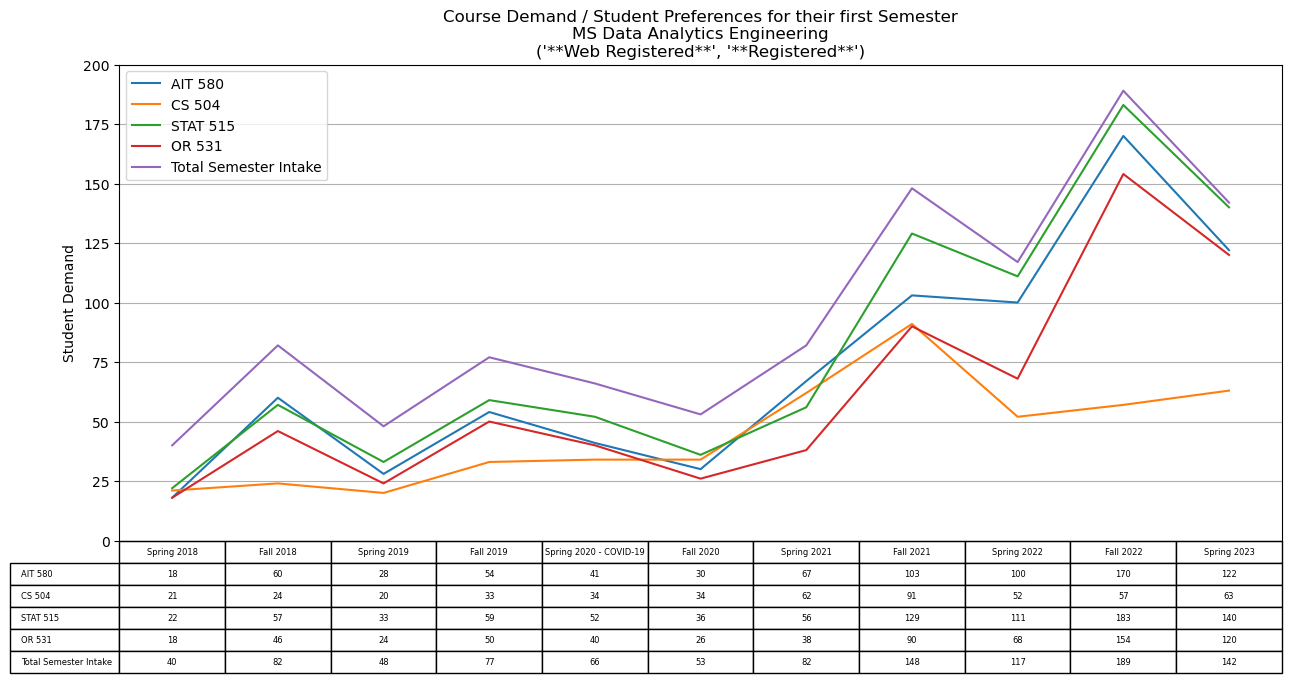

In [16]:
chart(
    prog = 'MS Data Analytics Engineering',
    crs_list = ['AIT 580', 'CS 504', 'STAT 515', 'OR 531'],
    include_tot_intake = True,
    status_list = ["**Web Registered**", "**Registered**"],
    term_name = None
)

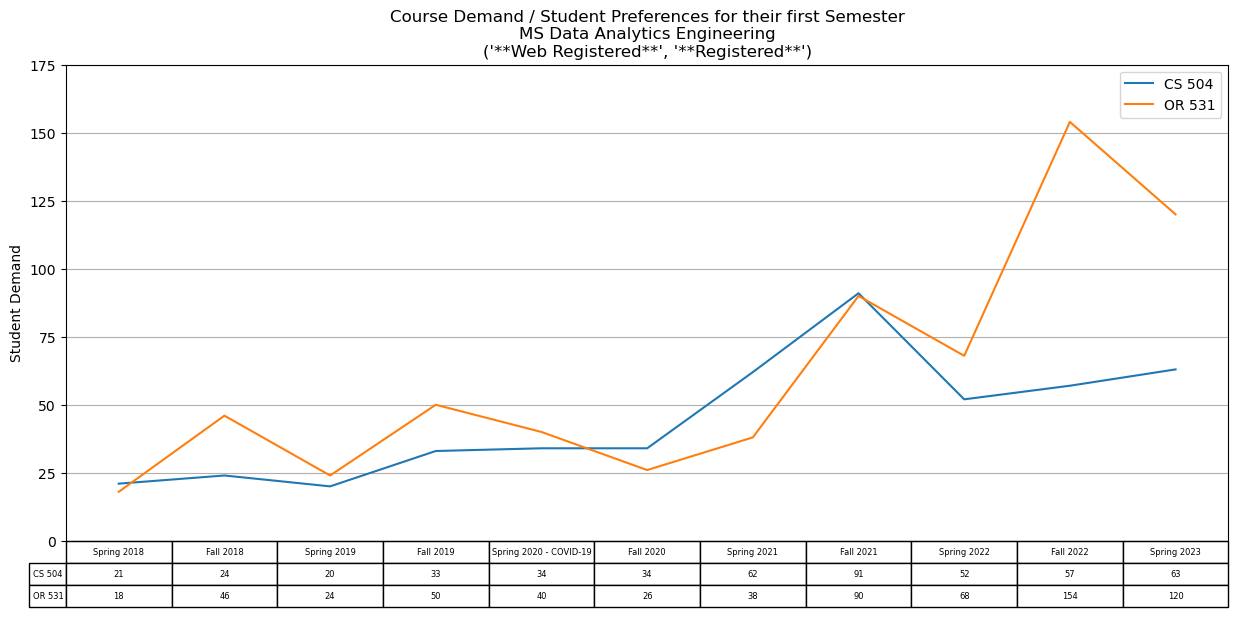

In [17]:
chart(
    prog = 'MS Data Analytics Engineering',
    crs_list = ['CS 504', 'OR 531'],
    include_tot_intake = False,
    status_list = ["**Web Registered**", "**Registered**"],
    term_name = None
)

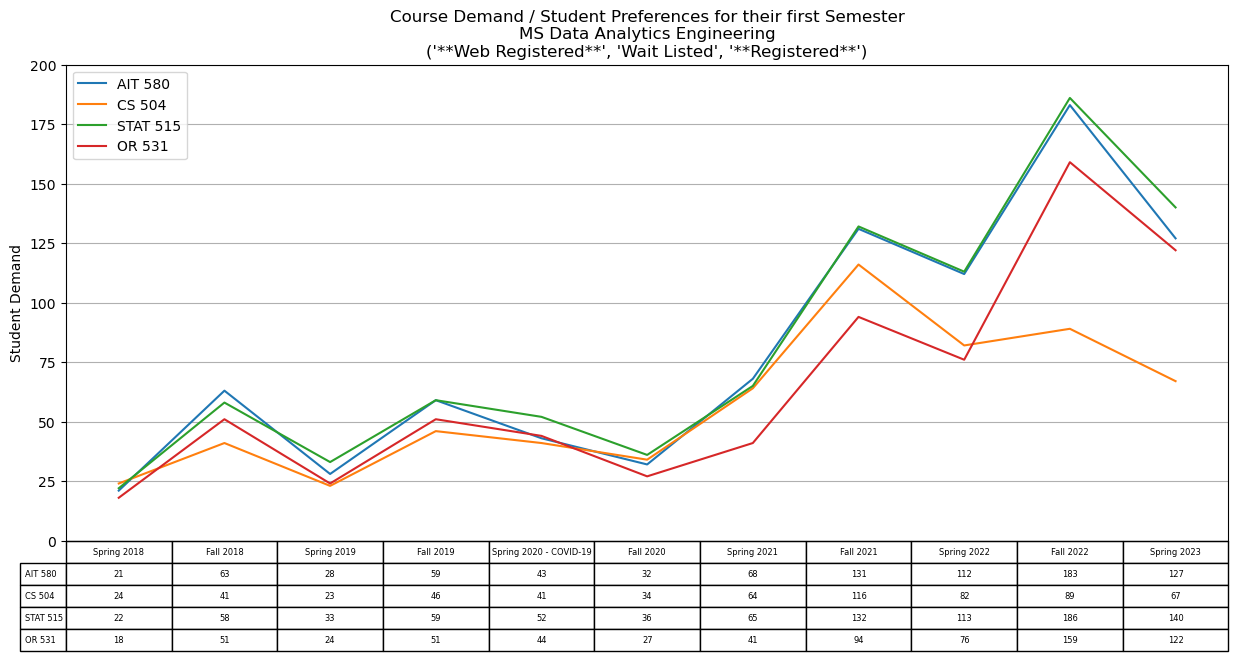

In [18]:
chart(
    prog = 'MS Data Analytics Engineering',
    crs_list = ['AIT 580', 'CS 504', 'STAT 515', 'OR 531'],
    include_tot_intake = False,
    status_list = ["**Web Registered**", "Wait Listed", "**Registered**"],
    term_name = None
)

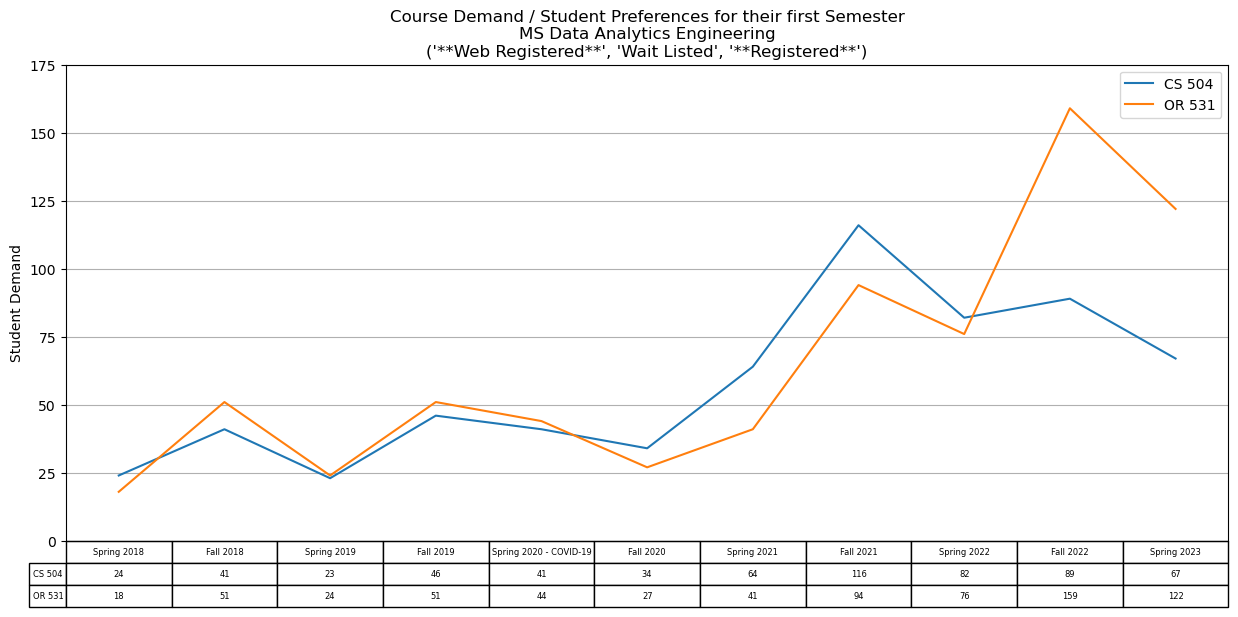

In [19]:
chart(
    prog = 'MS Data Analytics Engineering',
    crs_list = ['CS 504', 'OR 531'],
    include_tot_intake = False,
    status_list = ["**Web Registered**", "Wait Listed", "**Registered**"],
    term_name = None
)

### MS Computer Science

In [20]:
df_finalEnrollment.stu_prog_desc.unique()

['MS Information Systems', 'MS Infrmatn Security & Assrnce', 'MS Civil & Infrastructure Engr', 'MS Software Engineering', 'MS Computer Science', ..., 'MS Biostatistics', 'MENG GeoConStruct Engineering', 'MS Bioengineering', 'MS Cyber Security Engineering', 'MS Digital Forensics']
Length: 19
Categories (19, object): ['MENG GeoConStruct Engineering', 'MS Applied Info Technology', 'MS Bioengineering', 'MS Biostatistics', ..., 'MS Software Engineering', 'MS Statistical Science', 'MS Systems Engineering', 'MS Telecommunications']

# Hail Mary

In [49]:
def chart(  # Defining a function to generate a chart of the number of students registered for each course in a given program.
        prog = 'MS Data Analytics Engineering',
        crs_list = ['AIT 580', 'CS 504', 'STAT 515', 'OR 531'],
        include_tot_intake = True,
        status_list = ["**Web Registered**", "Wait Listed", "**Registered**"],
        term_name = None,
        debug_mode = False,
        note = None
    ):
    """
    A function to generate a chart of the number of students registered for each course in a given program.

    Parameters
    ----------
    prog : str
        The program name to query for.
    crs_list : list
        A list of courses to query for.
    include_tot_intake : bool
        Whether to include the total number of students admitted to the program in the chart.
    status_list : list
        A list of registration statuses to query for.
    term_name : str
        The term name to query for. If None, all terms will be queried.

    Returns
    -------
    None
        Plots a chart of the number of students registered for each course in a given program.
    """
    str_crs_cond = ""
    for crs in crs_list:
        str_crs_cond += f"\n\t\t,SUM(CASE WHEN crs = '{crs}' THEN 1 ELSE 0 END) AS '{crs}'"
    
    if include_tot_intake:
        tot_intake = ",COUNT(DISTINCT stu_id) AS 'Total Semester Intake'"
    else:
        tot_intake = "-- Not including Total Semester Intake"
    
    if term_name is None:
        term_cond = "-- All Terms"
    else:
        term_cond = f"AND reg_term_name = '{term_name}'"

    query = f""" --sql
        SELECT
            stu_admit_term_desc AS Semester
            {str_crs_cond}
            {tot_intake}
        FROM EnrollmentFinalStatus
        WHERE
                    stu_visa = 'F1 Visa'
            AND     stu_prog_desc = '{prog}'
            AND     stu_admit_term_year > 2017
            AND     reg_status IN {str(tuple(status_list))}
            AND     reg_term_desc = stu_admit_term_desc
            {term_cond}
        GROUP BY
            stu_admit_term_desc
        ORDER BY
            stu_admit_term_code
    """

    df = db_finalEnrollment.runQuery(query) \
        .set_index('Semester')
    
    df.to_csv( os.path.join('Data', '02_processed', 'BernieAnalytics', 'Charts', f'{prog}{"_"+note if note is not None else ""}.csv' ) )
    
    if debug_mode:
        print("="*40, "QUERY", "="*40)
        print(query)
        print("="*40, "Data ", "="*40)
        print(df.T)
    
    # Chart Method 1: Directly plotting without subplots
    df \
    .plot(kind='line', figsize=(15, 7),
                title = f"Course Demand / Student Preferences for their first Semester\n{prog} ({'_'+note if note is not None else ''})\n{str(tuple(status_list))}",
                xticks = [],
                yticks = list(range(0, df.values.max()+25, 25)),
                xlabel = "",
                ylabel = "Student Demand",
                grid = True)

    table = plt.table(
        cellText=df.T.values, rowLabels=df.T.index, colLabels=df.T.columns,\
            loc='bottom', cellLoc='center', snap=False
        )
    # Space between table and chart
    plt.subplots_adjust(bottom=0.2)
    table.auto_set_font_size(False)
    table.set_fontsize(6)
    table.scale(1, 1.5)

    # Exporting the chart to a file
    plt.savefig(
        os.path.join( 'Data', '02_processed', 'BernieAnalytics', 'Charts', f'{prog}{"_"+note if note is not None else ""}.png' ),
        dpi=300, bbox_inches='tight'
    )

In [26]:
core_courses ={
    ('MENG GeoConStruct Engineering', None) :
        ['CEIE 524', 'CEIE 525', 'CEIE 531', 'CEIE 575', 'CEIE 605'],
    ('MS Applied Info Technology','Non IT Management Concentration') :
        ['AIT 512', 'AIT 524', 'AIT 542', 'AIT 664'],
    ('MS Applied Info Technology','IT Management Concentration') :
        ['AIT 524', 'AIT 542', 'AIT 580', 'AIT 664'],
    ('MS Bioengineering', None) :
        ['BENG 520', 'BENG 521', 'BENG 541', 'BENG 526', 'BENG 537', 'BENG 538', 'BENG 501', 'BENG 514', 'BENG 517', 'BENG 601', 'BENG 602', 'STAT 535', 'STAT 560'],
    ('MS Biostatistics', None) :
        ['STAT 544', 'STAT 554', 'STAT 654', 'GCH 712', 'BENG 501', 'BINF 630', 'BENG 538', 'STAT 560', 'STAT 634', 'STAT 798'],
    ('MS Civil & Infrastructure Engr', None) :
        ['CEIE 601', 'CEIE 605'],
    ('MS Computer Engineering', None) :
        ['ECE 505', 'ECE 508', 'ECE 511', 'ECE 516', 'ECE 527', 'ECE 528', 'ECE 531', 'ECE 535', 'ECE 542', 'ECE 545', 'ECE 554', 'ECE 556', 'ECE 580', 'ECE 611', 'ECE 646', 'ECE 799'],
    # Computer Forensics Info not available
    ('MS Computer Science', None) :
        ['CS 550', 'CS 580', 'CS 584', 'CS 540', 'SWE 619', 'SWE 621', 'CS 555', 'CS 571', 'ISA 562', 'CS 583', 'CS 551'],
    ('MS Cyber Security Engineering', None) :
        ['CYSE 550', 'CYSE 570', 'CYSE 580', 'CYSE 610', 'CYSE 587', 'CYSE 690', 'CYSE 799'],
    ('MS Data Analytics Engineering', None) :
        ['AIT 580', 'STAT 515', 'OR 531', 'CS 504', 'OR 541', 'STAT 554', 'CS 584'],
    ('MS Digital Forensics', None) :
        ['DFOR 510','DFOR 660','DFOR 661','DFOR 663','DFOR 664','DFOR 670','DFOR 671','DFOR 672','DFOR 790'],
    ('MS Electrical Engineering', None) :
        ['ECE 511', 'ECE 521', 'ECE 527', 'ECE 528', 'ECE 535', 'ECE 539', 'ECE 542', 'ECE 552', 'ECE 580', 'ECE 584', 'ECE 586', 'ECE 587', 'ECE 621', 'ECE 630', 'ECE 799'],
    ('MS Information Systems', None) :
        ['COMP 502', 'CS 550', 'INFS 622', 'INFS 580', 'INFS 611'],
    ('MS Infrmatn Security & Assrnce', None) :
        ['ISA 562', 'ISA 656', 'INFS 612', 'CS 555'],
    ('MS Operations Research', None) :
        ['OR 541', 'OR 542', 'OR 568', 'OR 635'],
    ('MS Software Engineering', None) :
        ['SWE 619', 'SWE 621', 'SWE 632', 'SWE 637'],
    ('MS Statistical Science', None) :
        ['STAT 544', 'STAT 554', 'STAT 634', 'STAT 652', 'STAT 654'],
    ('MS Systems Engineering', None) :
        ['SYST 505', 'SYST 510', 'SYST 520', 'SYST 530', 'SYST 611'],
    ('MS Telecommunications', None) :
        ['TCOM 500', 'TCOM 514', 'TCOM 515', 'TCOM 535', 'TCOM 570', 'TCOM 610', 'TCOM 750']
}

In [34]:
# No enrollment data available for following courses
for i,s in list(core_courses.keys()):
    for crs in core_courses[(i,s)]:
        print(f"{crs}: {crs in df_finalEnrollment.crs.unique()}") if crs not in df_finalEnrollment.crs.unique() else None

CEIE 525: False
BENG 521: False
BENG 517: False
CYSE 799: False


TODO: CSV Export isn't working

In [52]:
# TODO: CSV Export isn't working
chart(
    prog = 'MS Data Analytics Engineering',
    crs_list=['AIT 580', 'STAT 515', 'OR 531', 'CS 504', 'OR 541', 'STAT 554', 'CS 584'],
    include_tot_intake=True,
    status_list = ['Enrolled', 'Waitlisted', 'Not Enrolled'],
    note = 'Core Courses',
    debug_mode=True
)

======================================== QUERY ========================================
 --sql
        SELECT
            stu_admit_term_desc AS Semester
            
		,SUM(CASE WHEN crs = 'AIT 580' THEN 1 ELSE 0 END) AS 'AIT 580'
		,SUM(CASE WHEN crs = 'STAT 515' THEN 1 ELSE 0 END) AS 'STAT 515'
		,SUM(CASE WHEN crs = 'OR 531' THEN 1 ELSE 0 END) AS 'OR 531'
		,SUM(CASE WHEN crs = 'CS 504' THEN 1 ELSE 0 END) AS 'CS 504'
		,SUM(CASE WHEN crs = 'OR 541' THEN 1 ELSE 0 END) AS 'OR 541'
		,SUM(CASE WHEN crs = 'STAT 554' THEN 1 ELSE 0 END) AS 'STAT 554'
		,SUM(CASE WHEN crs = 'CS 584' THEN 1 ELSE 0 END) AS 'CS 584'
            ,COUNT(DISTINCT stu_id) AS 'Total Semester Intake'
        FROM EnrollmentFinalStatus
        WHERE
                    stu_visa = 'F1 Visa'
            AND     stu_prog_desc = 'MS Data Analytics Engineering'
            AND     stu_admit_term_year > 2017
            AND     reg_status IN ('Enrolled', 'Waitlisted', 'Not Enrolled')
            AND     reg_term_desc = s

ValueError: zero-size array to reduction operation maximum which has no identity

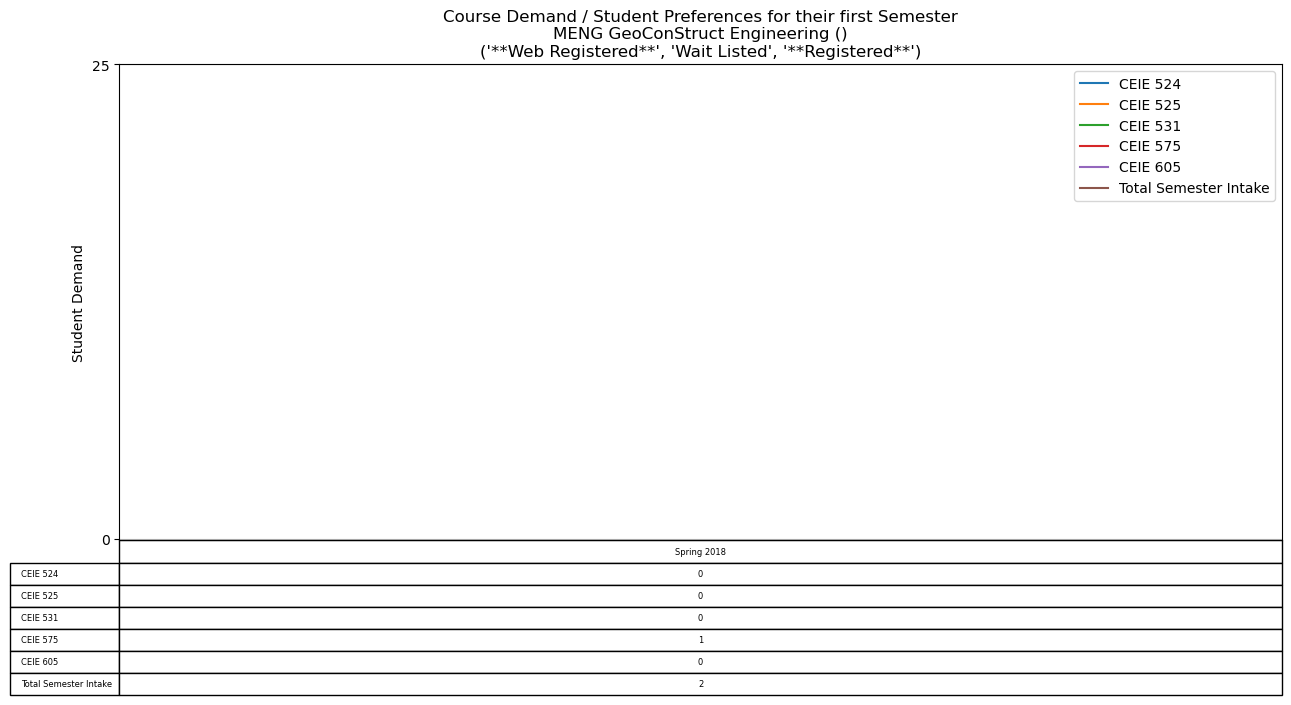

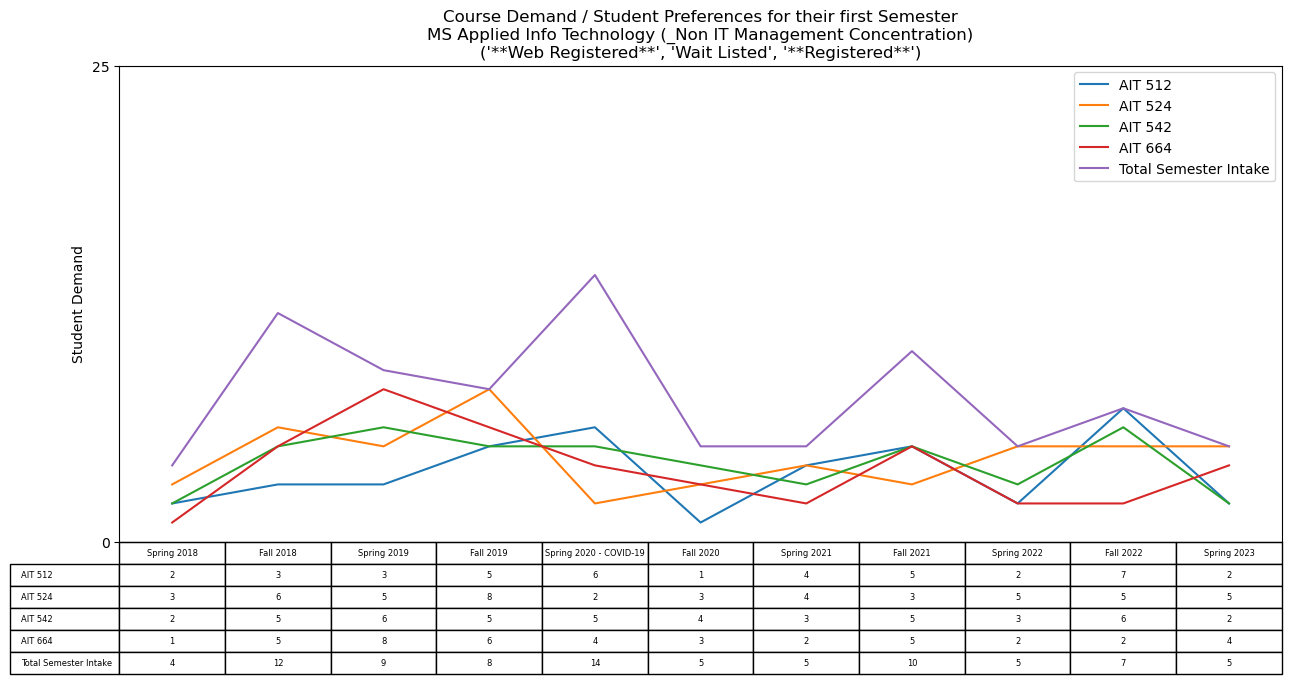

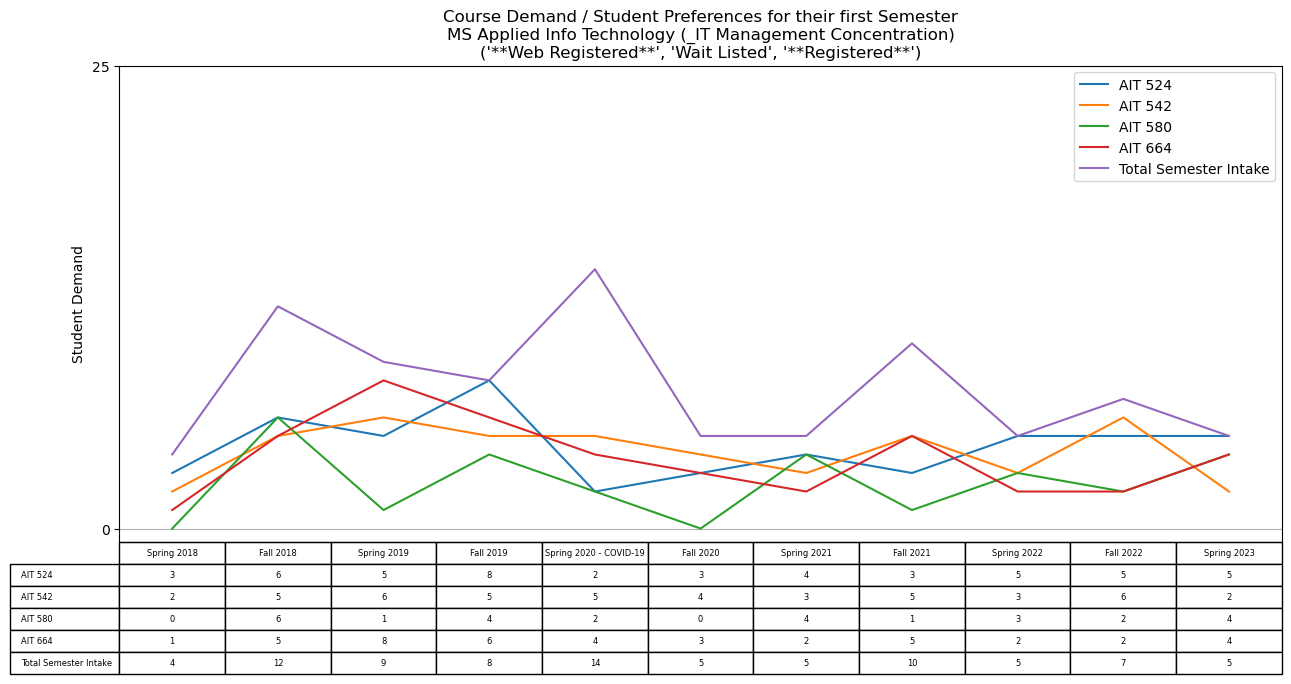

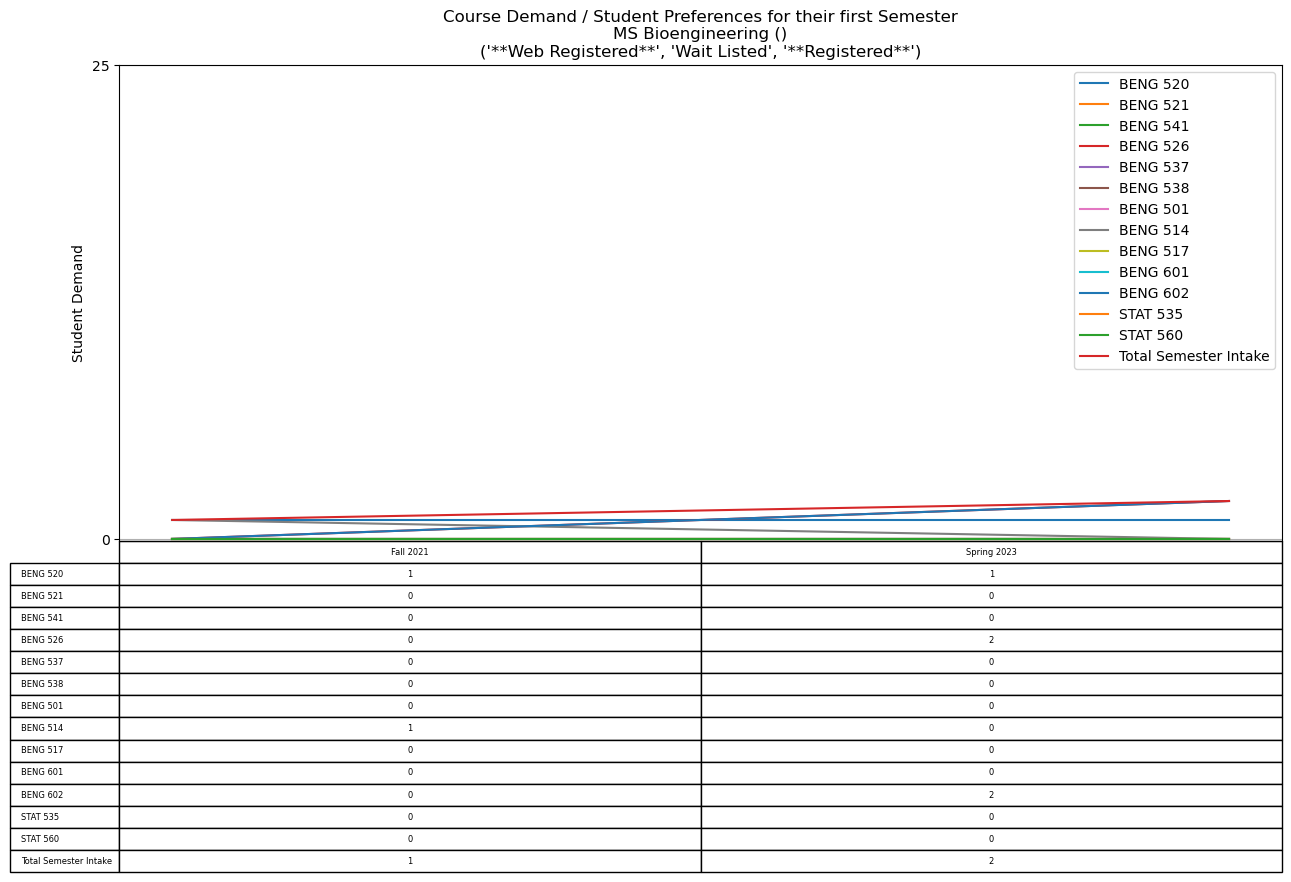

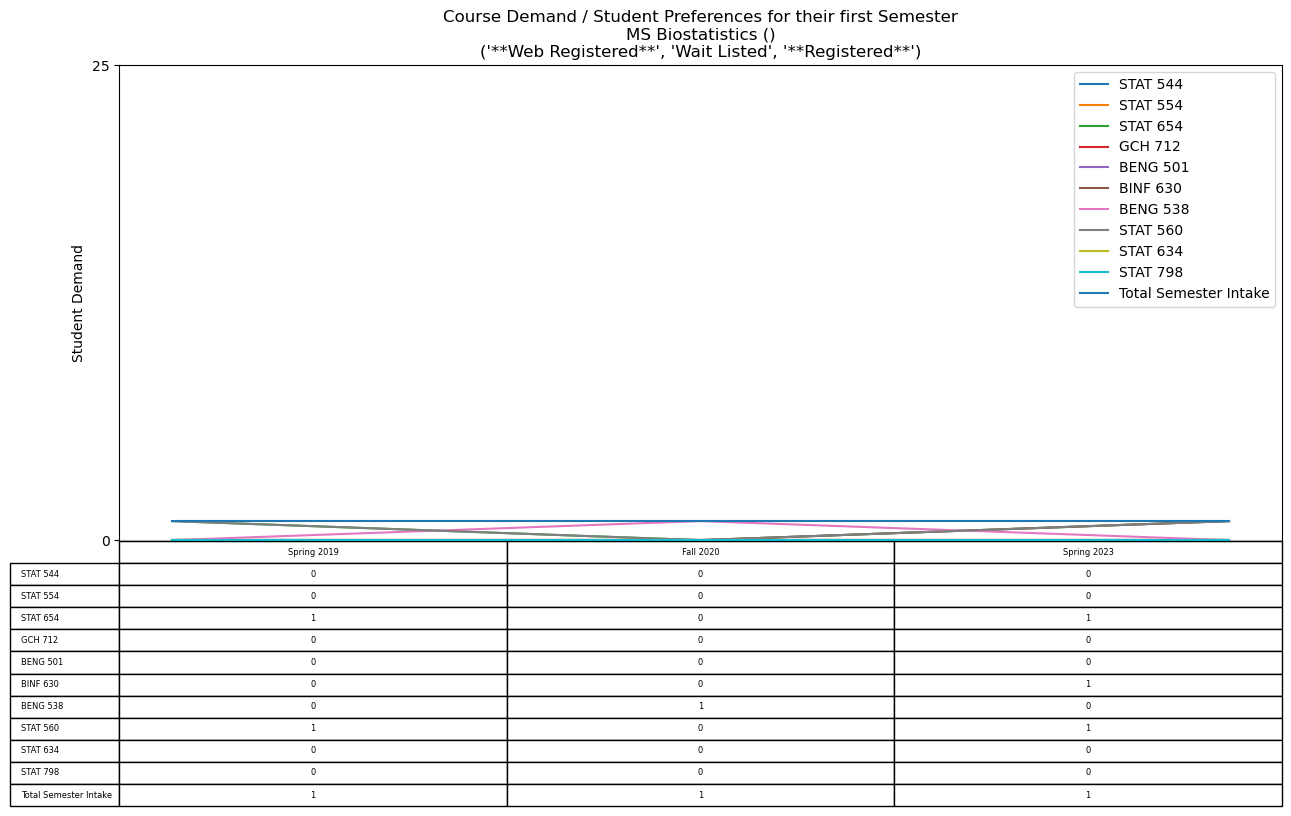

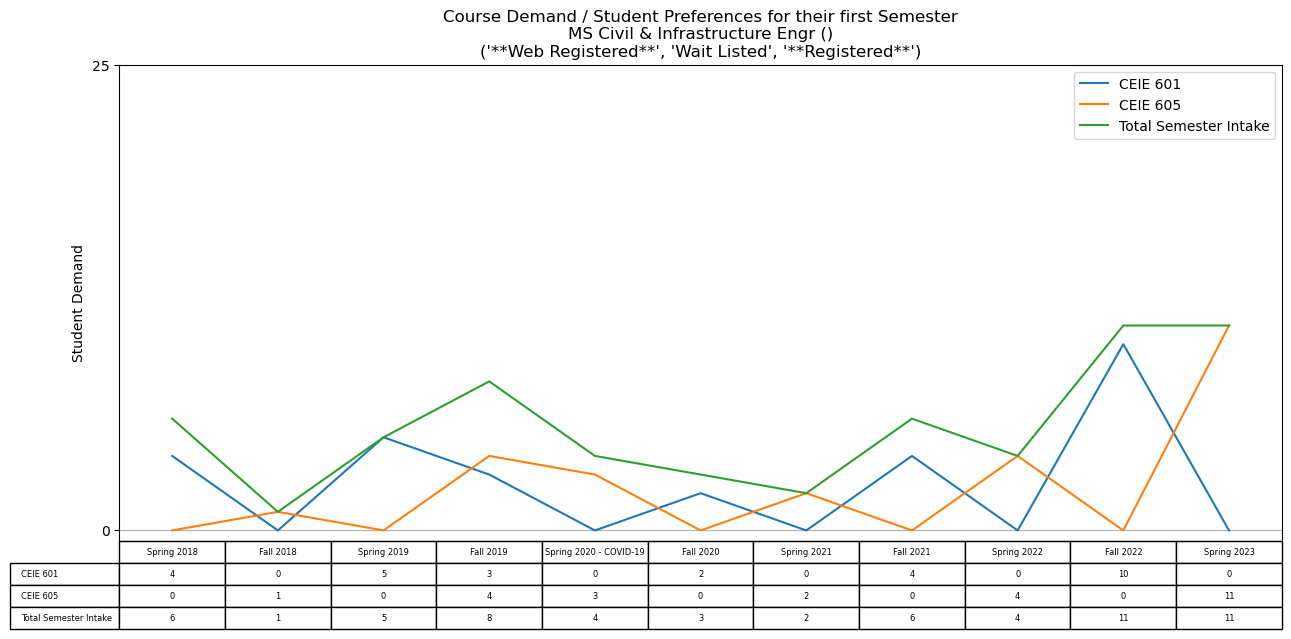

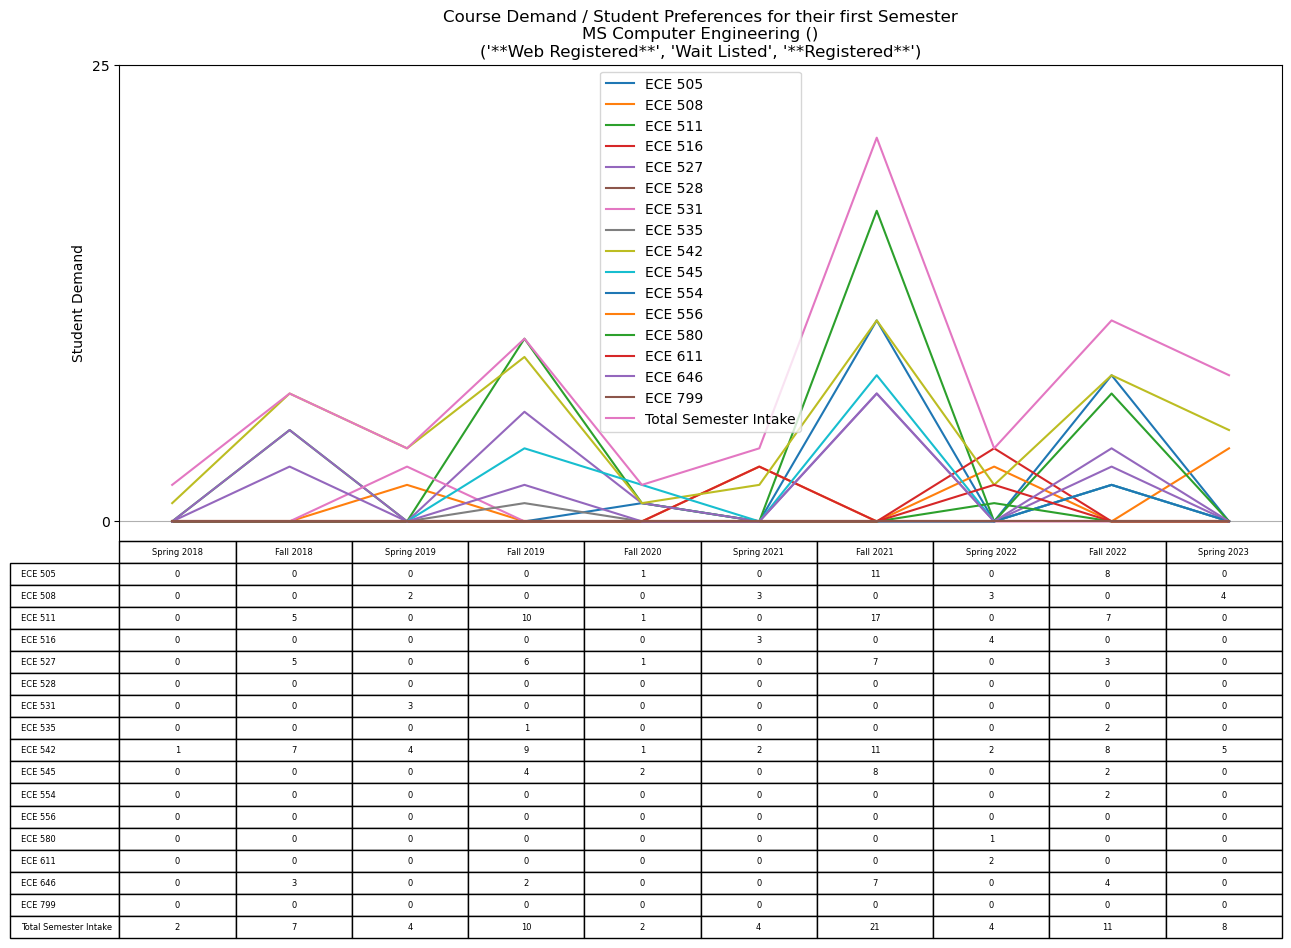

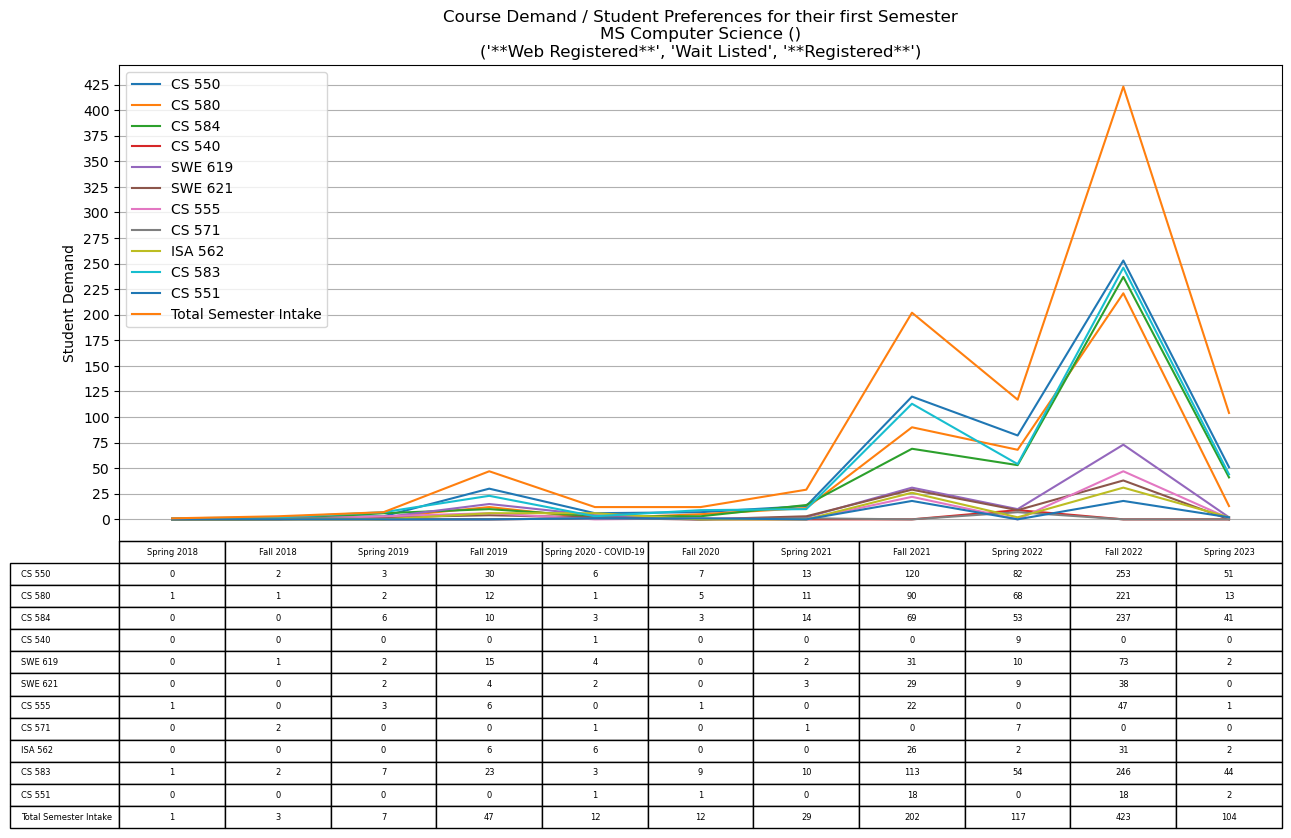

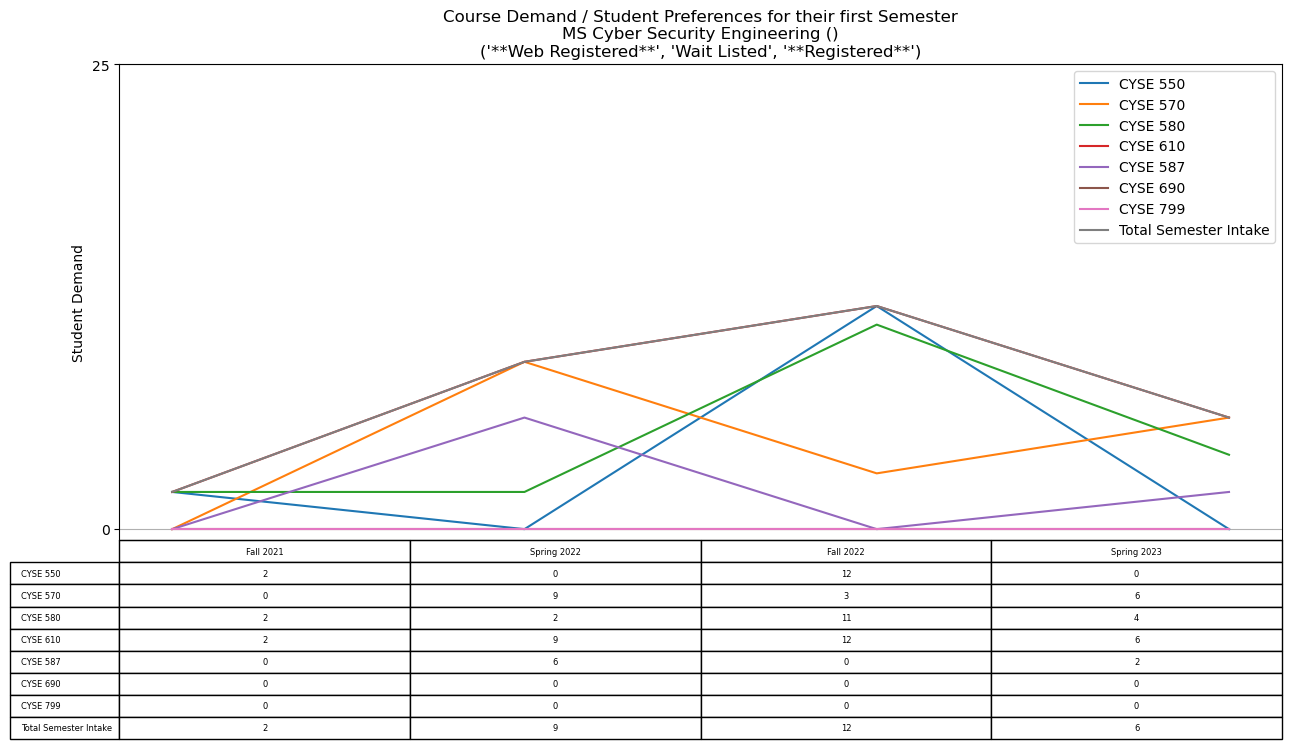

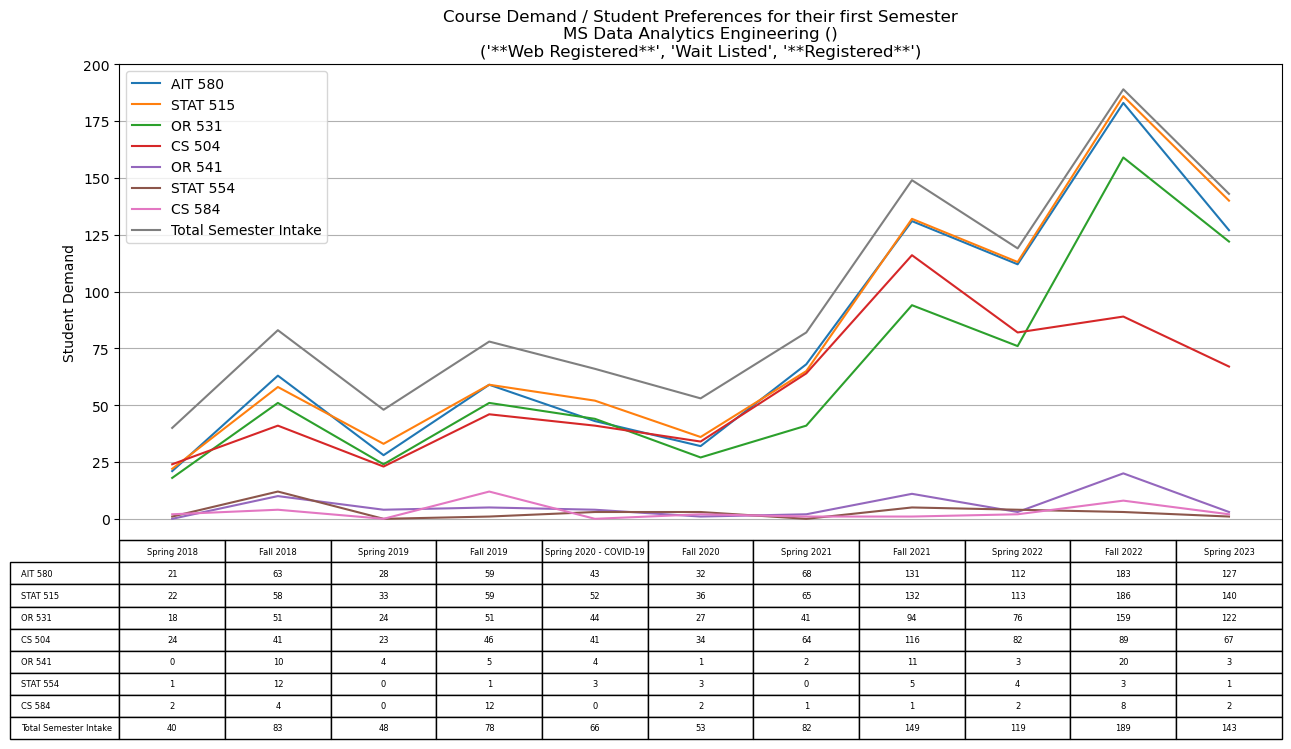

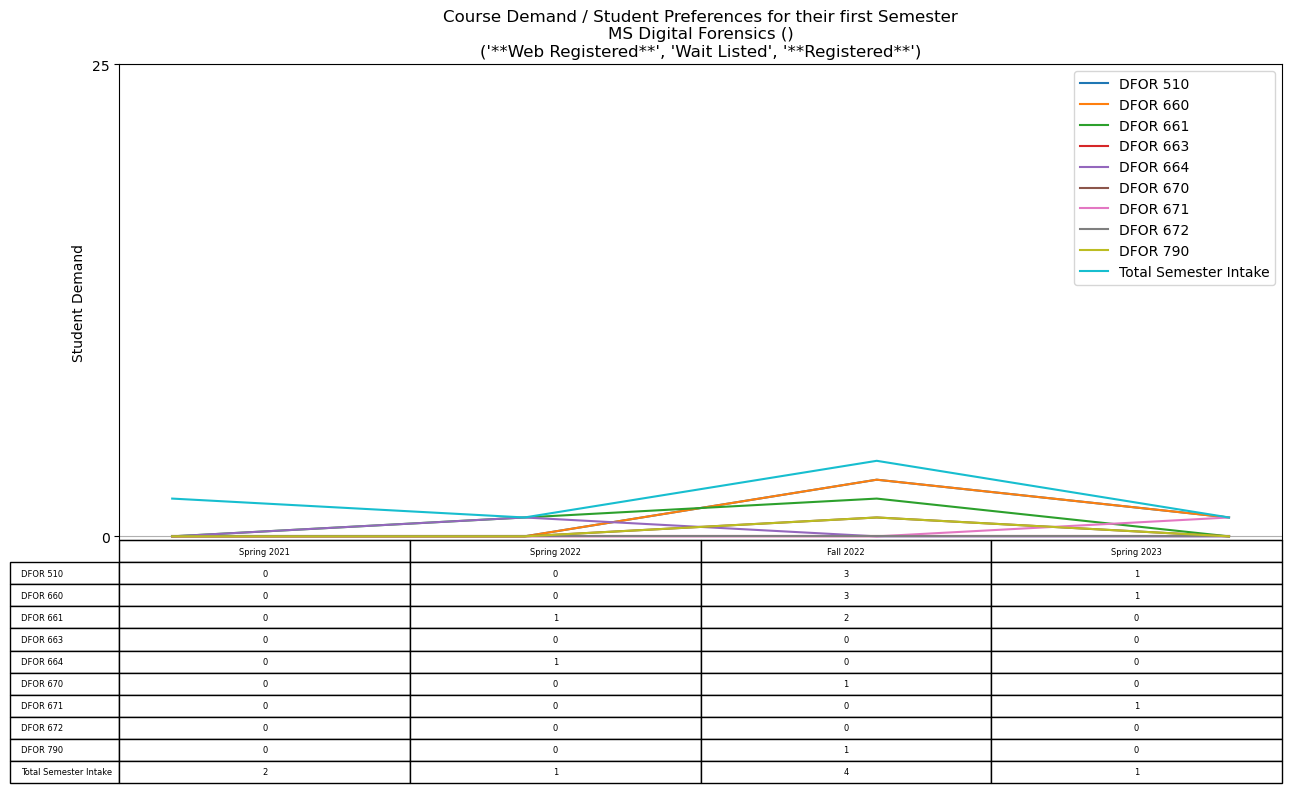

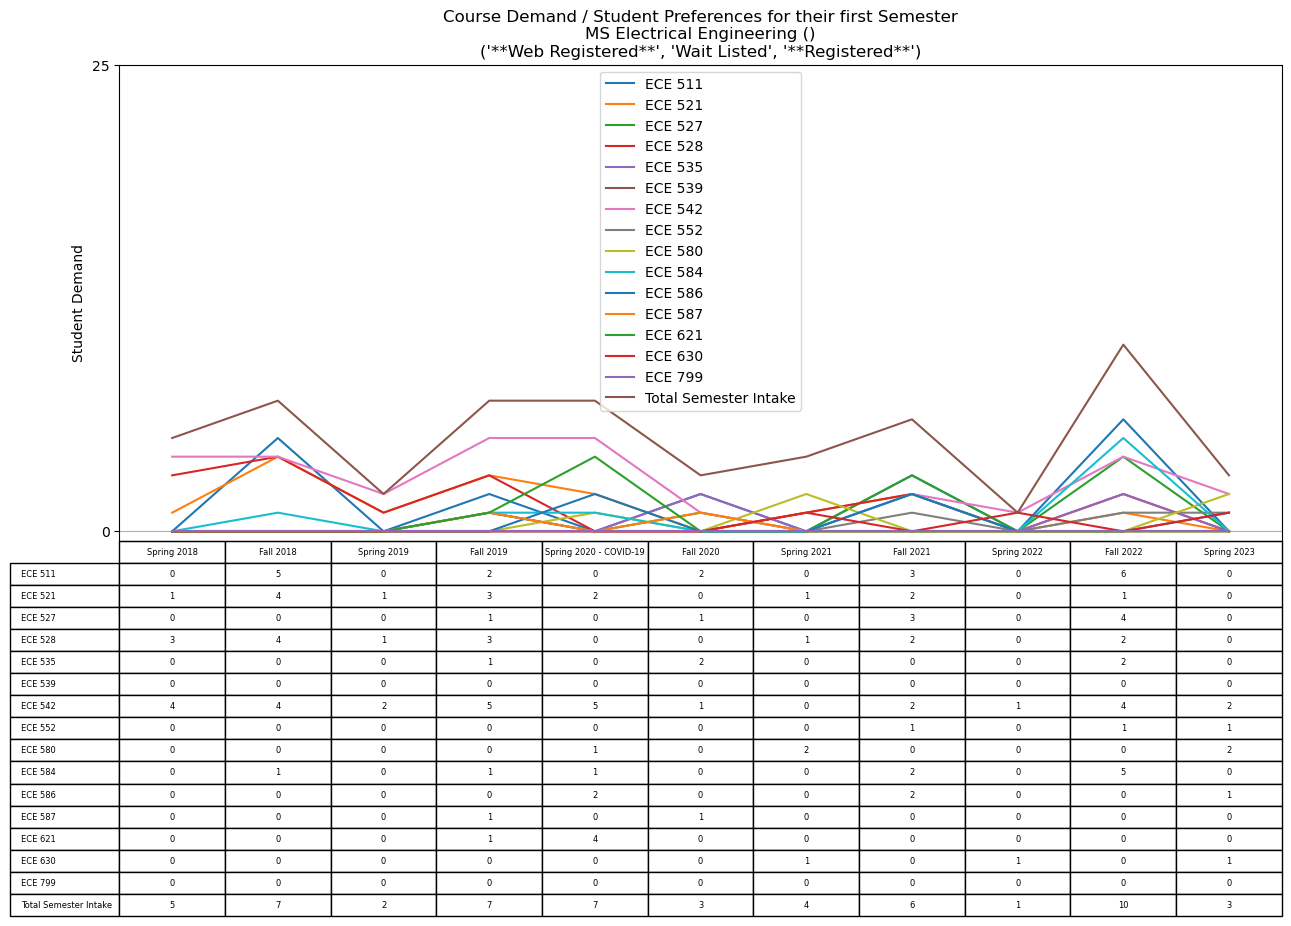

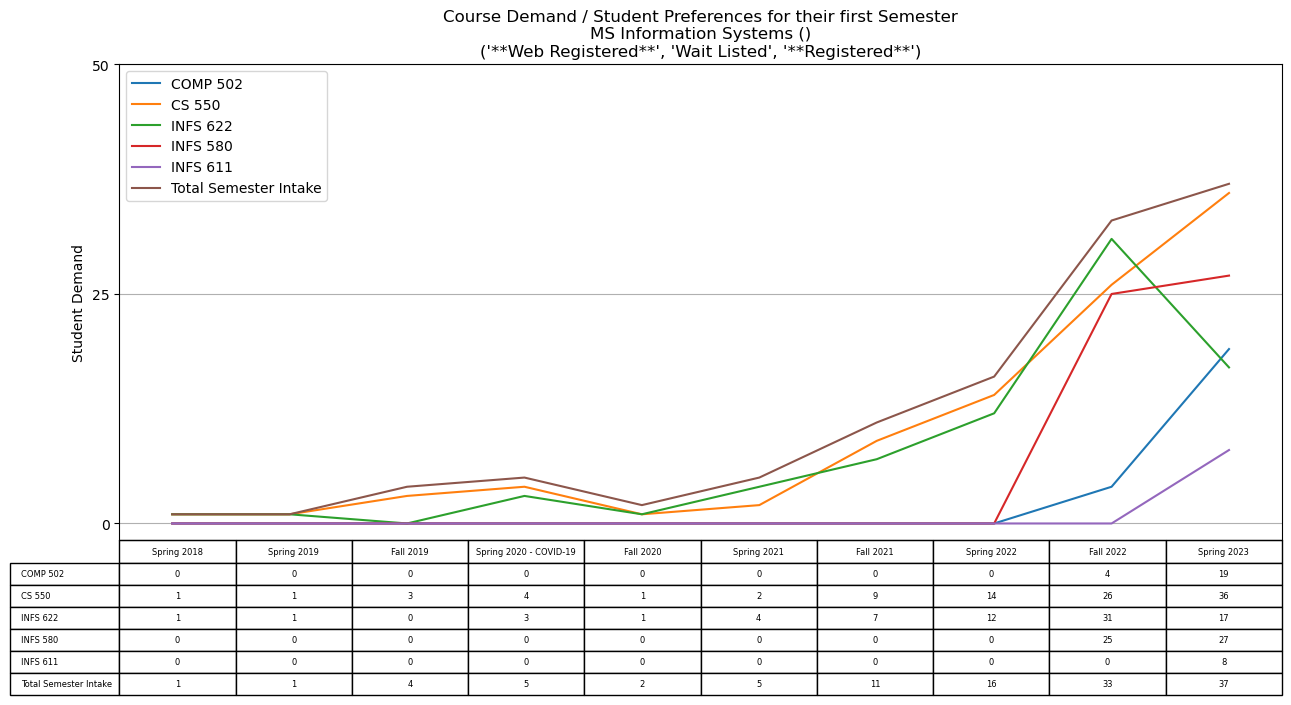

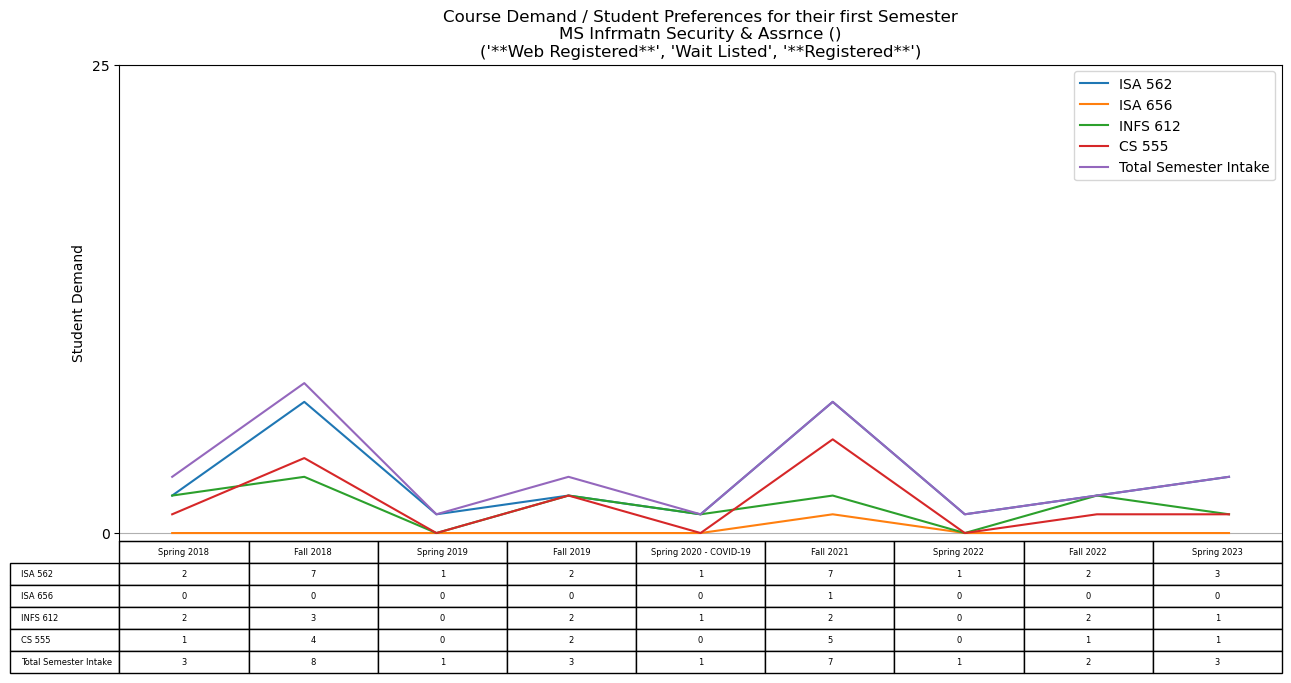

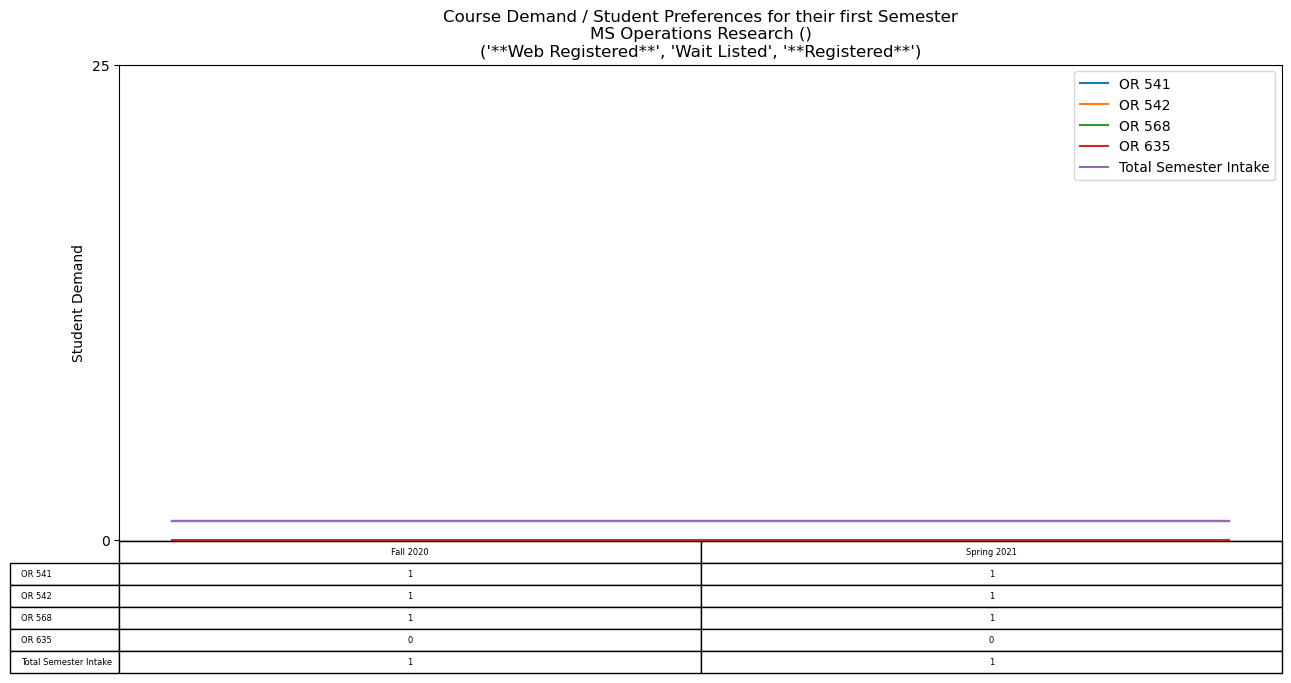

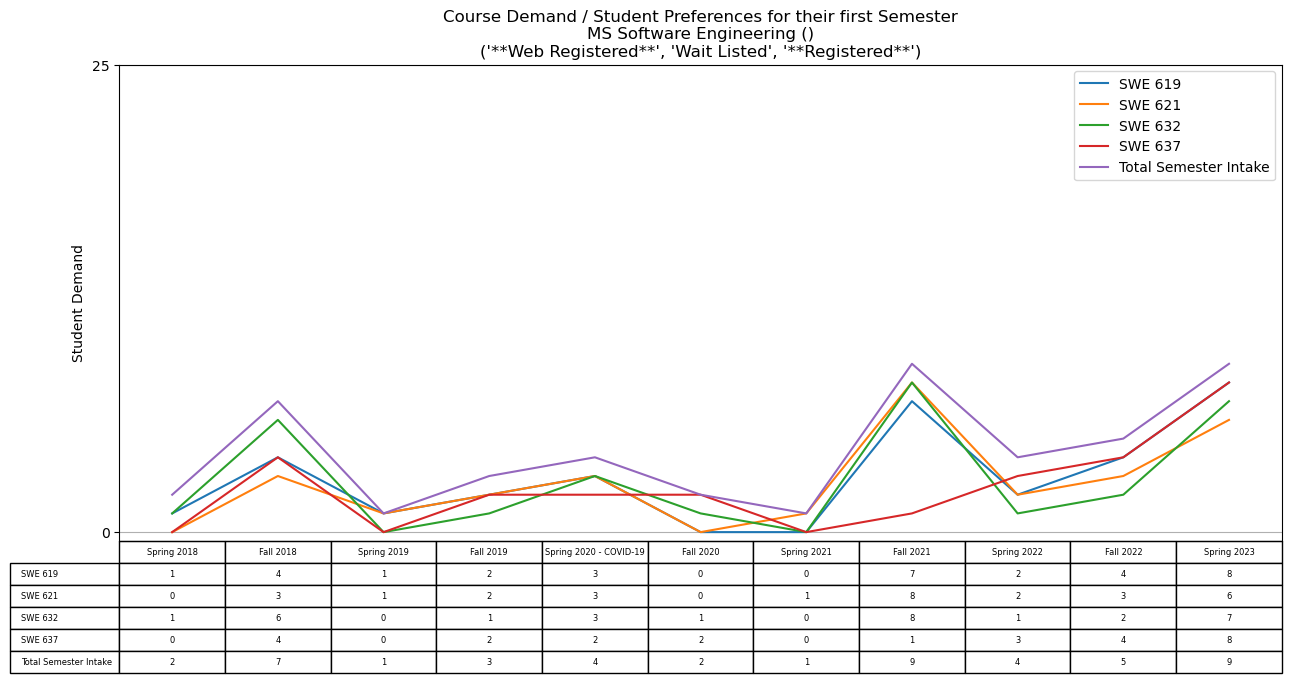

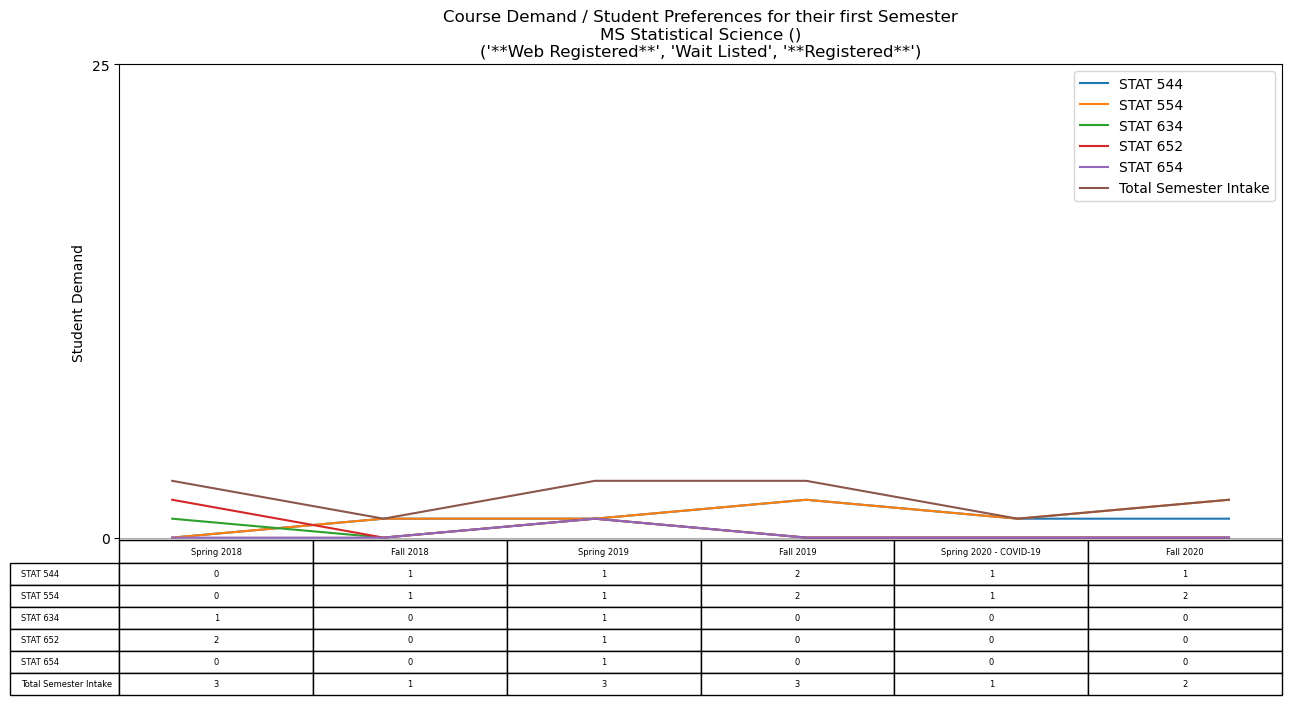

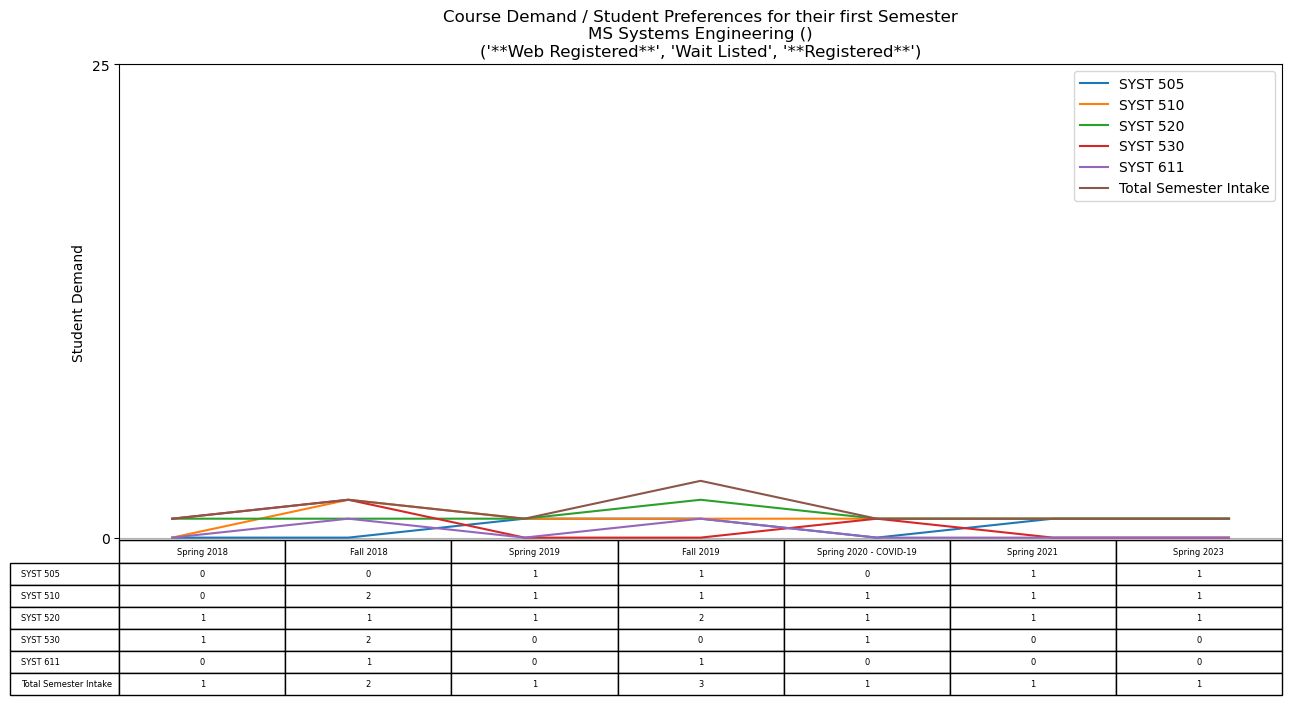

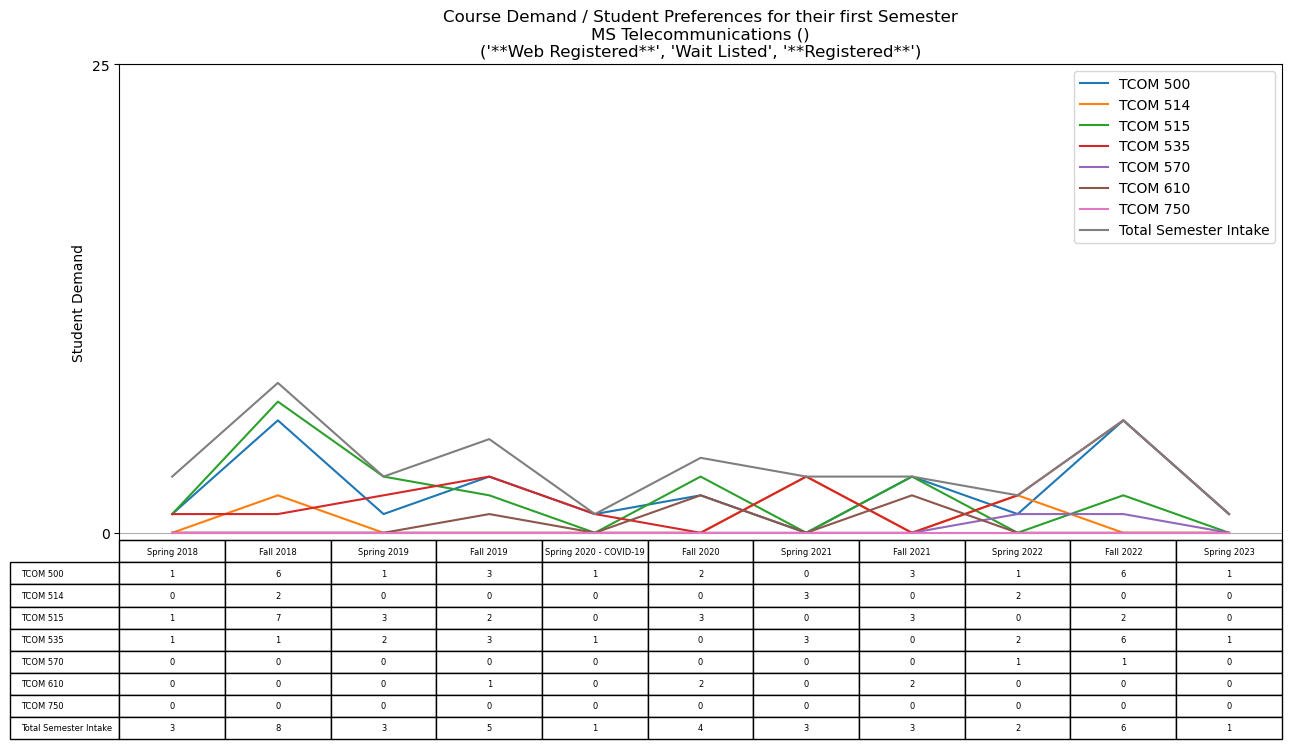

In [48]:
# LOOPING ALREADY
for (p,s),c_list in core_courses.items():
    chart(
        prog = p,
        crs_list = c_list,
        include_tot_intake = True,
        status_list = ["**Web Registered**", "Wait Listed", "**Registered**"],
        term_name = None,
        note = '_'+s if s else ''
    )

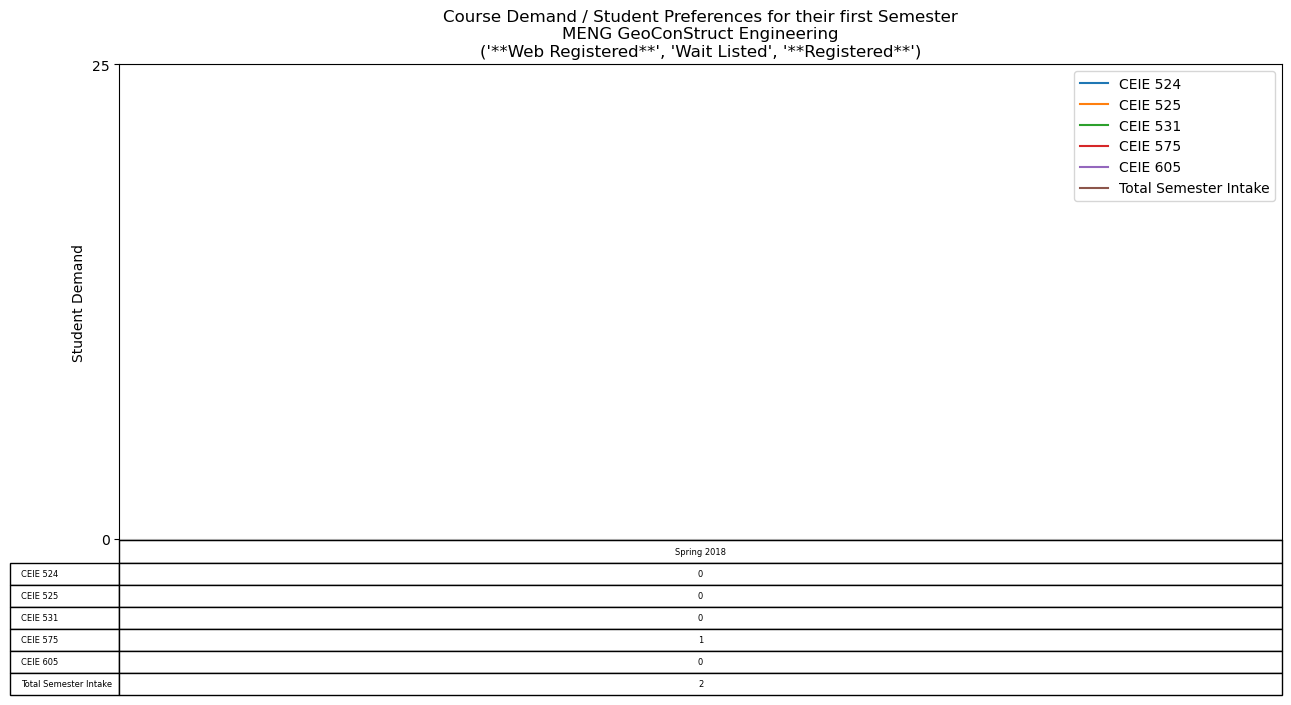

In [40]:
chart(
    prog = 'MENG GeoConStruct Engineering',
    crs_list = ['CEIE 524', 'CEIE 525', 'CEIE 531', 'CEIE 575', 'CEIE 605'],
    include_tot_intake = True,
    status_list = ["**Web Registered**", "Wait Listed", "**Registered**"],
    term_name = None,
    note = 'Test'
)

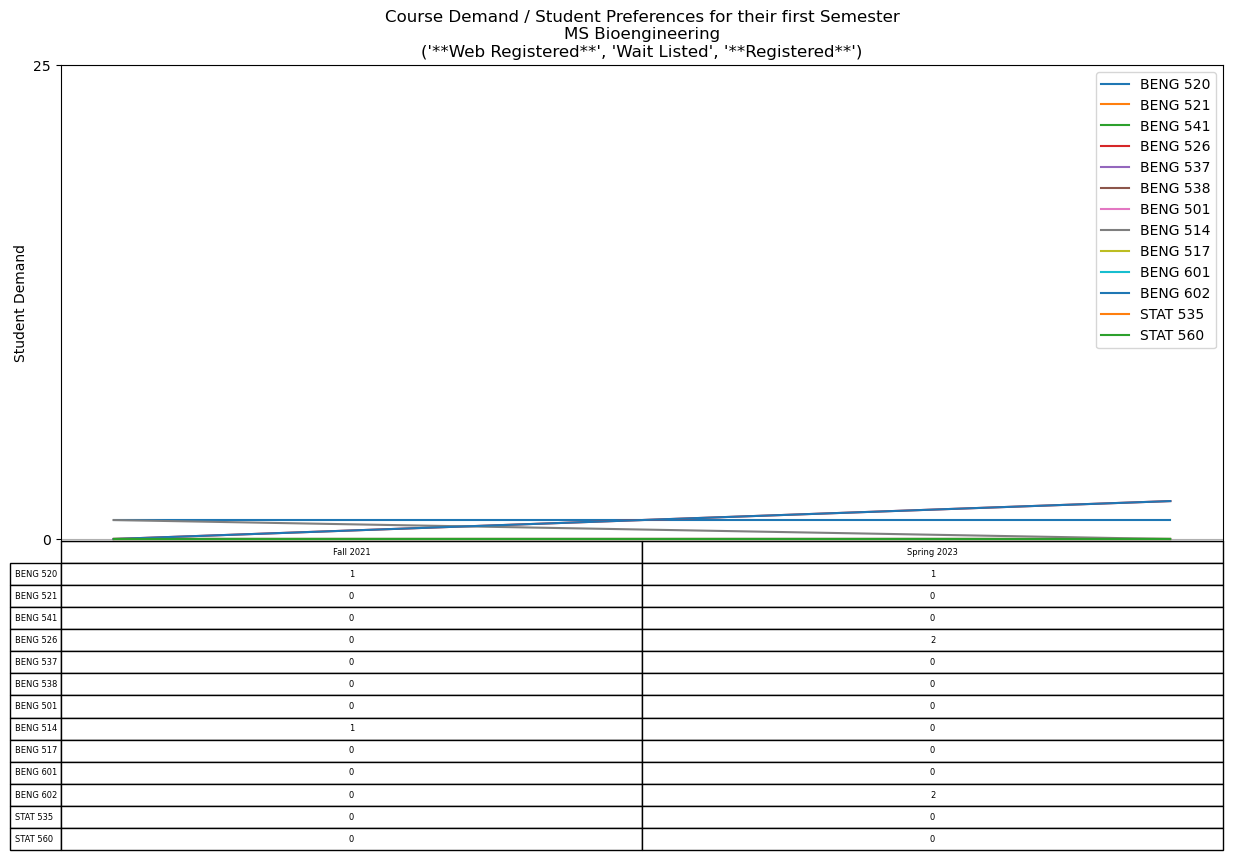

In [23]:
chart(
    prog = 'MS Bioengineering',
    crs_list = ['BENG 520', 'BENG 521', 'BENG 541', 'BENG 526', 'BENG 537', 'BENG 538', 'BENG 501', 'BENG 514', 'BENG 517', 'BENG 601', 'BENG 602', 'STAT 535', 'STAT 560'],
    include_tot_intake = False,
    status_list = ["**Web Registered**", "Wait Listed", "**Registered**"],
    term_name = None
)